<a href="https://colab.research.google.com/github/Waleed-Mujahid/Machine-Learning/blob/main/Model%20Selection%20and%20Grid%20Search/Heart_DIsease_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Heart Diease Data
>In this notebook I will be analysing the Heart Disease dataset taken from Kaggle. 

## Importing dependencies
>First we import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading our Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Waleed-Mujahid/Machine-Learning/main/Model%20Selection%20and%20Grid%20Search/heart.csv')

Let us take a look at the content of our Dataset

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


The data has following attributes: 
* Age
* Sex
* CP: chest pain type (4 values)
* Trestbps: resting blood pressure
* Chol: serum cholestoral in mg/dl
* Fbs: fasting blood sugar > 120 mg/dl
* Restecg: resting electrocardiographic results (values 0,1,2)
* Thalach: maximum heart rate achieved
* Exang: exercise induced angina
* Oldpeak = ST depression induced by exercise relative to rest
* Slope: the slope of the peak exercise ST segment
* CA: number of major vessels (0-3) colored by flourosopy
* Thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* Target: 0 = No diease; 1 = Heart disease detected

  The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The data has 1025 rows of data. All the values are non-null. So we do not need to do any data processing.

## Visualizizng our Data:
> Now we proceede to draw some graphs so we can better understand our data

### Symmetery of Data

The number of patients with no heart disease: 499
The number of patients having Heart disease: 526



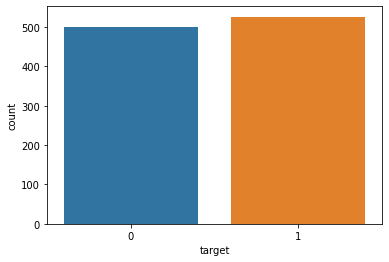

In [6]:
val = df.target.value_counts()
print(f'The number of patients with no heart disease: {val[0]}')
print(f'The number of patients having Heart disease: {val[1]}\n')
sns.countplot(data = df, x = 'target')
plt.show()

Thus our data is almost evenly distributed. 

### Correlation Matrix
  We make use of correlation matrix to better understand the relation between the Features and the Labels.

In [7]:
corr_matrix = df.corr()

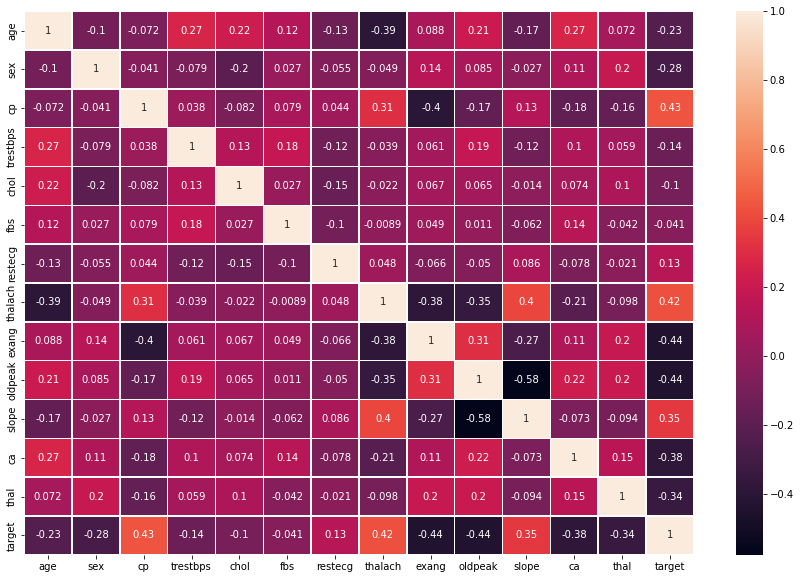

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, cmap="rocket", annot = True,linewidths=.5, ax=ax)

> From the above graph it is visible that
- Chest pain, slope and Max heart rate (thalach) are positively related to the data.
- Meanwhile Exang(chest pain), CA and oldpeak are negatively related to the data.

#### Positively related Features

1. Chest pain

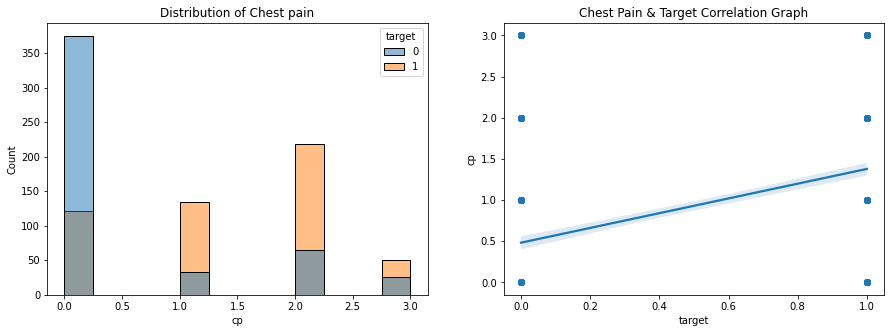

In [9]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
sns.histplot(data = df , x = 'cp', hue = 'target')
plt.title('Distribution of Chest pain')

ax1 = fig.add_subplot(122)
sns.regplot(y ='cp', x='target', data = df)
plt.title('Chest Pain & Target Correlation Graph')
plt.show()

2. Maximum heart rate

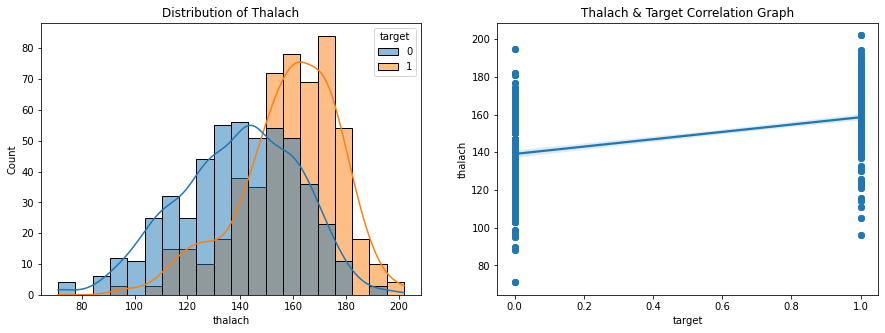

In [10]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
sns.histplot(data = df , x = 'thalach', hue = 'target', kde = True)
plt.title('Distribution of Thalach')

ax1 = fig.add_subplot(122)
sns.regplot(y ='thalach', x='target', data = df)
plt.title('Thalach & Target Correlation Graph')
plt.show()

#### Negatively related Features
1. Oldpeak



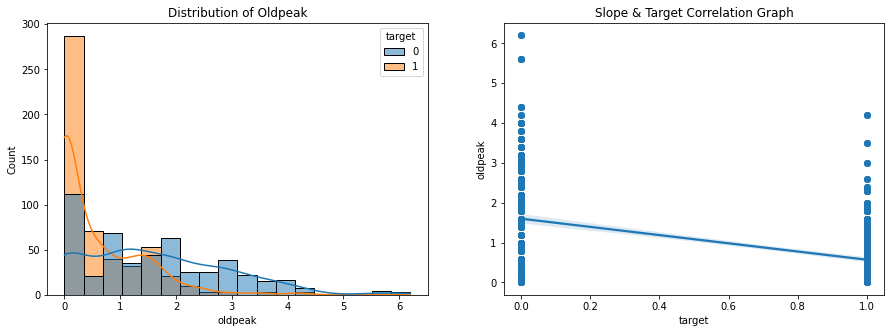

In [11]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
sns.histplot(data = df , x = 'oldpeak', hue = 'target', kde = True)
plt.title('Distribution of Oldpeak')

ax1 = fig.add_subplot(122)
sns.regplot(y ='oldpeak', x='target', data = df)
plt.title('Slope & Target Correlation Graph')
plt.show()

2. Exang

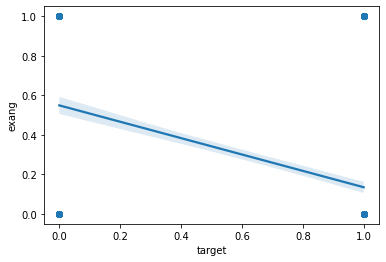

In [12]:
sns.regplot(y='exang', x='target', data = df)

### Dimension Reduction
  Now we will reduce our 13 features to 2D so we can easily visualize it. 

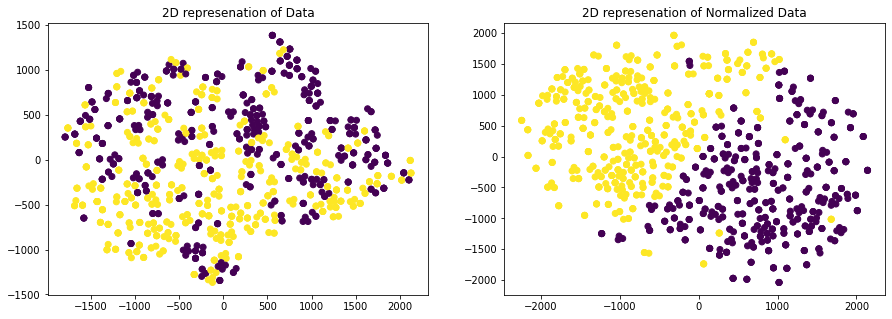

In [13]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
scaler = StandardScaler()
scaler.fit(df)
data = scaler.transform(df)

X_tsne = TSNE(init= 'pca',learning_rate = 250, n_iter = 5000, perplexity = 50, random_state = 13).fit_transform(df)
X_tsne_scaled = TSNE(init= 'pca',learning_rate = 250, n_iter = 5000, perplexity = 50, random_state = 13).fit_transform(data)

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax1.title.set_text('2D represenation of Data')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data[:,-1])

ax2 = fig.add_subplot(122)
plt.scatter(X_tsne_scaled[:, 0], X_tsne_scaled[:, 1], c=data[:,-1])
ax2.title.set_text('2D represenation of Normalized Data')
plt.show()

The graph on left shows the 2D representaiton of the the actual data. While the one on right shows the 2D representation if we normalized the data first. From the above figure it is clear that obtainting a decision boundary on normalized data is easier as compared to unnormalized data.

## Building our Model

### Pre-processing our Data

In [14]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Normalizing our Data, makes training easier
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Adding more features can boost Accuracy
poly = PolynomialFeatures()
X_scaled = poly.fit_transform(X_normalized)

print(f'Number of Features before: {df.shape[1] - 1}')
print(f'The new shape of Fearures array is : {X.shape[1]}')

Number of Features before: 13
The new shape of Fearures array is : 13


### Splitting Data into Test and Train sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=13)

### Selecting a Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = LogisticRegression(max_iter = 150) # model does not convege in default iterations
clf2 = RandomForestClassifier(random_state = 42)
clf3 = GradientBoostingClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

GradientBoostingClassifier()

In [18]:
from sklearn.metrics import accuracy_score
print(f'The accuracy of Logistic Regression is: {accuracy_score(y_test,clf1.predict(X_test)):.2f} ')
print(f'The accuracy of Random Forest Classifier is: {accuracy_score(y_test,clf2.predict(X_test)):.2f} ')
print(f'The accuracy of Gradient Boosting Classifier is: {accuracy_score(y_test,clf3.predict(X_test)):.2f} ')

The accuracy of Logistic Regression is: 0.94 
The accuracy of Random Forest Classifier is: 0.96 
The accuracy of Gradient Boosting Classifier is: 0.96 


So we can see that Random Forrest Classifier has the best accuracy among the models we have seen. Now we tune the hyperparamter of Random Forrest Classifier to get best posssible results. For this we conduct a randomized grid search

### Grid Search

   We choose RandomizedSearchCV for our grid search instead of GridSearchCV because it can be more time-taking as we have many hyperparameters to tume.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

parameters = {
    'n_estimators':[30,50,100,200,400],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split' : [2, 5, 10],
    'bootstrap' : [True, False],
    'max_depth' : [int(x) for x in np.linspace(10, 200, num = 5)],
    'random_state': [42]
} 
clf = RandomizedSearchCV(RandomForestClassifier() , parameters , cv=  5, random_state = 13)

In [20]:
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 57, 105, 152, 200],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [30, 50, 100, 200, 400],
                                        'random_state': [42]},
                   random_state=13)

  We create a pandas DataFrame of the Grid search results for easy viewing of the data.

In [21]:
df = pd.DataFrame(clf.cv_results_)

In [22]:
df[['mean_fit_time','param_n_estimators', 'param_max_features','param_max_depth','param_bootstrap','mean_test_score','param_min_samples_split','rank_test_score']]

,mean_fit_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,mean_test_score,param_min_samples_split,rank_test_score
0,1.039380,400,sqrt,152,True,0.985366,5,3
1,1.035714,400,auto,152,True,0.985366,5,3
2,0.877970,200,sqrt,57,False,0.987805,2,2
3,0.076931,30,sqrt,105,True,0.985366,5,3
4,0.078070,30,auto,57,True,0.990244,2,1
5,0.258727,100,sqrt,105,True,0.985366,5,3
6,0.131263,50,sqrt,57,True,0.985366,5,3
7,0.130821,50,auto,105,True,0.982927,2,8
8,0.506037,200,sqrt,57,True,0.980488,10,9
9,1.008548,400,sqrt,152,True,0.979268,10,10


  We use the parameters with the highest accuracy acheived.

In [23]:
model = RandomForestClassifier(n_estimators =30,max_features='auto',max_depth=57, bootstrap = True, min_samples_split = 5, random_state =42)
#model = RandomForestClassifier(n_estimators =100,max_features='auto',max_depth=10, bootstrap = True, min_samples_split = 5, random_state =42)

In [24]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=57, min_samples_split=5, n_estimators=30,
                       random_state=42)

In [25]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [26]:
print(f'The accuracy of Random Forest Classifier before tuning hyperparameters: {accuracy_score(y_test,clf2.predict(X_test)) * 100:.2f} %')
print(f'The accuracy after tuning hyperparameters: {accuracy*100:.2f} %')

The accuracy of Random Forest Classifier before tuning hyperparameters: 95.61 %
The accuracy after tuning hyperparameters: 98.54 %


> Thus by tuning hyperparameters, the accuracy of our model increased by 3 % which may not sound like much. But it decreased the error rate from 4.5 % to 1.5 % which is quite impressive. So we conclude that conducting a grid search can greatly increase a model' accuracy.

### Confusion Matrix
  Confusion matrix is a good way to evaluate the accuracy and recall of a model.

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

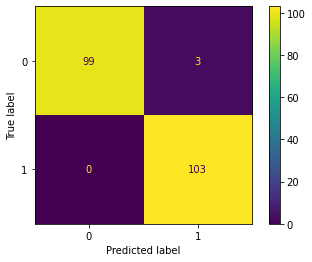

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm)
disp.plot()  

Thus the model has high accuracy and recall.